## Aman Preet Singh Gulati 

## Task 1
- Predict the percentage of an student based on the no. of study hours.
- What will be predicted score if a student studies for 9.25 hrs/ day?

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
df  = pd.read_csv( "http://bit.ly/w-data")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


## Gaining insights about data

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### From above info we can conclude that there is no null values in our data

In [7]:
df.shape

(25, 2)

## Data Visualization using Scatter Plot

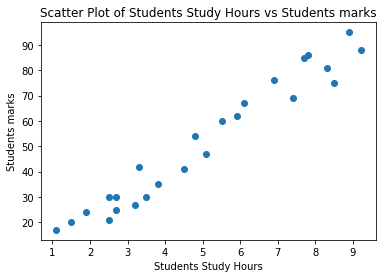

In [8]:
plt.scatter(x =df.Hours, y = df.Scores)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")
plt.show()

From above scatter plot we can conclude that as soon as the "Hours" of study increases the "Marks" of student also increases

## Preparing data for ML algorithm

### Data Cleaning

In [9]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Split the dataset

In [10]:
X = df.drop("Scores", axis = "columns")
y = df.drop("Hours", axis = "columns")
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (25, 1)
shape of y =  (25, 1)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=51)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (20, 1)
shape of y_train =  (20, 1)
shape of X_test =  (5, 1)
shape of y_test =  (5, 1)


## Select a model and train it

### y = m * x + c

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [13]:
lr.fit(X_train,y_train)

LinearRegression()

In [14]:
lr.coef_

array([[9.56433743]])

In [15]:
lr.intercept_

array([2.70197068])

## Applying Linear Regression Mathematically

In [16]:
m = 3.93
c = 50.44
y  = m * 4 + c 
y

66.16

In [17]:
lr.predict([[4]])[0][0].round(2)

40.96

In [18]:
y_pred  = lr.predict(X_test)
y_pred

array([[55.30582657],
       [76.34736893],
       [68.69589898],
       [82.08597139],
       [28.52568176]])

## Data Frame which will illustrates the original marks and predicted marks

In [19]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,5.5,60.0,55.305827
1,7.7,85.0,76.347369
2,6.9,76.0,68.695899
3,8.3,81.0,82.085971
4,2.7,30.0,28.525682


In [20]:
lr.score(X_test,y_test)

0.9238518102278777

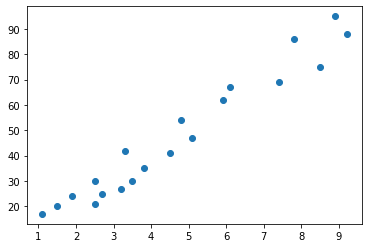

In [21]:
plt.scatter(X_train,y_train)

## Scatter + Regression Plot to conclude that model worked quite well on data 

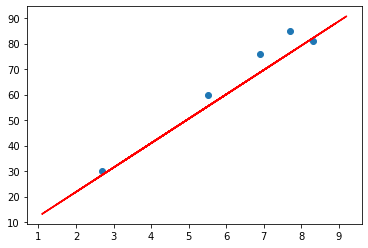

In [22]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color = "r")

## Model Deployement

In [23]:
import joblib
joblib.dump(lr, "student_mark_predictor.pkl")

['student_mark_predictor.pkl']

In [24]:
model = joblib.load("student_mark_predictor.pkl")

In [25]:
model.predict([[5]])[0][0]

50.52365785611766

## What will be predicted score if a student studies for 9.25 hrs/ day?

In [26]:
model.predict([[9.25]])[0][0].round(2)

91.17

## So, Accodring to prediction when student will study for 9.25 hrs/day he/she will score 91.17%.